In [ ]:
# Run this to install tensorFlow & Keras
# !pip install tensorflow
# !pip install keras
# !pip install tensorflow maths

Reference Link:
https://www.projectpro.io/recipes/make-predictions-keras-model#mcetoc_1g21q2u52b

In [1]:
import pandas as pd
import csv
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
data= pd.read_csv('test_data.csv')

In [3]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,899,431981.100,241687.660,312224.900,370450.280,418044.060,378997.800,363845.560,312163.400,1.110058e+06,...,274630.7500,231141.690,275961.880,142283.400,112126.2000,131592.830,180607.220,207882.520,165721.670,166132.1400
1,1161,95985.870,98339.040,100752.760,99128.310,98928.016,97606.090,93778.820,88226.450,7.511774e+04,...,29142.7520,26075.434,17287.861,18909.990,5037.1973,9891.294,9548.527,13434.884,11186.450,20797.8950
2,570,229283.580,246451.620,262925.970,236911.060,227629.100,203751.520,203207.530,224859.940,2.455338e+05,...,86508.1600,62805.477,51983.910,102715.420,57750.0820,8177.153,8857.479,32162.820,55638.355,25285.9120
3,358,42195.676,23092.393,32716.550,48932.510,78070.020,47988.360,72731.150,57882.098,4.963140e+04,...,18991.7440,16547.996,8883.313,14923.980,16572.5700,20189.969,20912.602,14785.850,14771.403,16103.0880
4,1197,92784.210,92727.680,49244.440,17743.734,78359.120,51351.395,69214.170,48059.010,4.408267e+04,...,70473.0100,33546.190,24164.918,27934.361,44986.3160,19101.422,6482.677,32715.365,48874.060,61201.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1073,141893.730,124581.450,104575.660,57723.490,84460.530,120547.770,162362.670,241790.380,2.461422e+05,...,12003.8330,39675.582,53897.594,56955.290,131642.3900,142117.700,118446.695,69183.360,58751.254,55296.0300
146,852,484445.280,67137.120,122429.180,767952.900,590222.940,430354.940,415113.620,275275.880,2.986914e+05,...,405886.5000,684600.300,535808.940,313820.800,508601.0300,280288.780,758217.250,165175.880,115262.630,113910.0500
147,59,72267.270,116690.914,103109.870,70986.400,46647.945,40994.266,52104.047,71650.300,5.603456e+04,...,19798.2290,24590.314,24331.682,20062.135,24450.8030,24650.781,12502.687,13541.526,30630.506,42404.6500
148,353,42499.918,36551.770,27322.506,28718.883,18176.580,18129.422,24705.412,18090.377,3.537514e+03,...,7387.6294,4871.967,7849.931,8615.082,17699.7750,34669.703,28724.602,20027.848,10770.246,6302.0938


In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,899,431981.100,241687.660,312224.900,370450.280,418044.060,378997.800,363845.560,312163.400,1.110058e+06,...,274630.7500,231141.690,275961.880,142283.400,112126.2000,131592.830,180607.220,207882.520,165721.670,166132.1400
1,1161,95985.870,98339.040,100752.760,99128.310,98928.016,97606.090,93778.820,88226.450,7.511774e+04,...,29142.7520,26075.434,17287.861,18909.990,5037.1973,9891.294,9548.527,13434.884,11186.450,20797.8950
2,570,229283.580,246451.620,262925.970,236911.060,227629.100,203751.520,203207.530,224859.940,2.455338e+05,...,86508.1600,62805.477,51983.910,102715.420,57750.0820,8177.153,8857.479,32162.820,55638.355,25285.9120
3,358,42195.676,23092.393,32716.550,48932.510,78070.020,47988.360,72731.150,57882.098,4.963140e+04,...,18991.7440,16547.996,8883.313,14923.980,16572.5700,20189.969,20912.602,14785.850,14771.403,16103.0880
4,1197,92784.210,92727.680,49244.440,17743.734,78359.120,51351.395,69214.170,48059.010,4.408267e+04,...,70473.0100,33546.190,24164.918,27934.361,44986.3160,19101.422,6482.677,32715.365,48874.060,61201.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1073,141893.730,124581.450,104575.660,57723.490,84460.530,120547.770,162362.670,241790.380,2.461422e+05,...,12003.8330,39675.582,53897.594,56955.290,131642.3900,142117.700,118446.695,69183.360,58751.254,55296.0300
146,852,484445.280,67137.120,122429.180,767952.900,590222.940,430354.940,415113.620,275275.880,2.986914e+05,...,405886.5000,684600.300,535808.940,313820.800,508601.0300,280288.780,758217.250,165175.880,115262.630,113910.0500
147,59,72267.270,116690.914,103109.870,70986.400,46647.945,40994.266,52104.047,71650.300,5.603456e+04,...,19798.2290,24590.314,24331.682,20062.135,24450.8030,24650.781,12502.687,13541.526,30630.506,42404.6500
148,353,42499.918,36551.770,27322.506,28718.883,18176.580,18129.422,24705.412,18090.377,3.537514e+03,...,7387.6294,4871.967,7849.931,8615.082,17699.7750,34669.703,28724.602,20027.848,10770.246,6302.0938


## Loading the exiting Model

In [24]:
# Loading the Model
model = load_model('best_model.mdl_wts.hdf5')

In [7]:
# Checking of the model is loaded or not
model

In [8]:
# Returns pretty much every information about your model
config = model.get_config() 

In [9]:
# Printing the layers and information on the model
print(config["layers"][0]["config"]["batch_input_shape"]) # returns a tuple of width, height and channels

(None, 250)


In [7]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,899,431981.100,241687.660,312224.900,370450.280,418044.060,378997.800,363845.560,312163.400,1.110058e+06,...,274630.7500,231141.690,275961.880,142283.400,112126.2000,131592.830,180607.220,207882.520,165721.670,166132.1400
1,1161,95985.870,98339.040,100752.760,99128.310,98928.016,97606.090,93778.820,88226.450,7.511774e+04,...,29142.7520,26075.434,17287.861,18909.990,5037.1973,9891.294,9548.527,13434.884,11186.450,20797.8950
2,570,229283.580,246451.620,262925.970,236911.060,227629.100,203751.520,203207.530,224859.940,2.455338e+05,...,86508.1600,62805.477,51983.910,102715.420,57750.0820,8177.153,8857.479,32162.820,55638.355,25285.9120
3,358,42195.676,23092.393,32716.550,48932.510,78070.020,47988.360,72731.150,57882.098,4.963140e+04,...,18991.7440,16547.996,8883.313,14923.980,16572.5700,20189.969,20912.602,14785.850,14771.403,16103.0880
4,1197,92784.210,92727.680,49244.440,17743.734,78359.120,51351.395,69214.170,48059.010,4.408267e+04,...,70473.0100,33546.190,24164.918,27934.361,44986.3160,19101.422,6482.677,32715.365,48874.060,61201.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1073,141893.730,124581.450,104575.660,57723.490,84460.530,120547.770,162362.670,241790.380,2.461422e+05,...,12003.8330,39675.582,53897.594,56955.290,131642.3900,142117.700,118446.695,69183.360,58751.254,55296.0300
146,852,484445.280,67137.120,122429.180,767952.900,590222.940,430354.940,415113.620,275275.880,2.986914e+05,...,405886.5000,684600.300,535808.940,313820.800,508601.0300,280288.780,758217.250,165175.880,115262.630,113910.0500
147,59,72267.270,116690.914,103109.870,70986.400,46647.945,40994.266,52104.047,71650.300,5.603456e+04,...,19798.2290,24590.314,24331.682,20062.135,24450.8030,24650.781,12502.687,13541.526,30630.506,42404.6500
148,353,42499.918,36551.770,27322.506,28718.883,18176.580,18129.422,24705.412,18090.377,3.537514e+03,...,7387.6294,4871.967,7849.931,8615.082,17699.7750,34669.703,28724.602,20027.848,10770.246,6302.0938


In [13]:
data = df.values

In [14]:
data

array([[8.99000000e+02, 4.31981100e+05, 2.41687660e+05, ...,
        2.07882520e+05, 1.65721670e+05, 1.66132140e+05],
       [1.16100000e+03, 9.59858700e+04, 9.83390400e+04, ...,
        1.34348840e+04, 1.11864500e+04, 2.07978950e+04],
       [5.70000000e+02, 2.29283580e+05, 2.46451620e+05, ...,
        3.21628200e+04, 5.56383550e+04, 2.52859120e+04],
       ...,
       [5.90000000e+01, 7.22672700e+04, 1.16690914e+05, ...,
        1.35415260e+04, 3.06305060e+04, 4.24046500e+04],
       [3.53000000e+02, 4.24999180e+04, 3.65517700e+04, ...,
        2.00278480e+04, 1.07702460e+04, 6.30209380e+03],
       [1.13400000e+03, 2.36147310e+05, 2.28431220e+05, ...,
        1.99761020e+04, 2.83114800e+04, 4.47174450e+04]])

In [21]:
data = data.reshape(-1, 37650)

In [22]:
data.shape

(1, 37650)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              251000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 806,803
Trainable params: 806,803
Non-trainable params: 0
_________________________________________________________________


In [28]:
arr = df.to_numpy()

In [29]:
arr

array([[8.99000000e+02, 4.31981100e+05, 2.41687660e+05, ...,
        2.07882520e+05, 1.65721670e+05, 1.66132140e+05],
       [1.16100000e+03, 9.59858700e+04, 9.83390400e+04, ...,
        1.34348840e+04, 1.11864500e+04, 2.07978950e+04],
       [5.70000000e+02, 2.29283580e+05, 2.46451620e+05, ...,
        3.21628200e+04, 5.56383550e+04, 2.52859120e+04],
       ...,
       [5.90000000e+01, 7.22672700e+04, 1.16690914e+05, ...,
        1.35415260e+04, 3.06305060e+04, 4.24046500e+04],
       [3.53000000e+02, 4.24999180e+04, 3.65517700e+04, ...,
        2.00278480e+04, 1.07702460e+04, 6.30209380e+03],
       [1.13400000e+03, 2.36147310e+05, 2.28431220e+05, ...,
        1.99761020e+04, 2.83114800e+04, 4.47174450e+04]])

In [36]:
data.shape

TensorShape([1, 37650])

In [37]:
data = tf.constant(arr)

In [ ]:
data = tf.keras.layers.Reshape((-1, 1000))(data)

In [40]:
model.predict((-1,data))

d:\Computer Files\Anaconda3\lib\site-packages\keras\engine\data_adapter.py:705: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(x)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Spiling the DataSet into training and testing

In [16]:
training_data,testing_data= train_test_split(df, test_size=0.2, random_state=25)

In [17]:
print(training_data)
print(testing_data)

     Unnamed: 0           0           1           2           3           4  \
54         1026   16552.336  172114.520  813351.750  911202.300   96240.540   
113        1382   97694.380  200977.200  440881.160  374941.160  395902.800   
135         588  101483.690  151557.530  120482.250  116966.720  112665.625   
4          1197   92784.210   92727.680   49244.440   17743.734   78359.120   
115        1489  885450.750  830799.400  799841.500  748037.250  726507.400   
..          ...         ...         ...         ...         ...         ...   
118        1259   41925.117   32178.344   19229.367   21623.275   38369.590   
61          597  214554.660  211188.310  207860.600  207565.520  215566.060   
143         824  396300.780  345811.380  307441.600  409097.220  472847.560   
62         1272   46008.094   33198.105   20300.445   27153.158   18485.057   
132         416   96925.805   52454.812   27400.250   34248.605  169266.660   

               5           6           7           

In [14]:
print(training_data.shape[0])

120


In [34]:
# spiliting the taining data into teo X and Y sizes 
(X_train, Y_train) = train_test_split(training_data)
print(X_train, Y_train)

     Unnamed: 0           0           1           2           3            4  \
50          451   18648.857   17650.059   23312.127   17691.074   26194.5780   
86          309  105487.010  142758.170   39585.605   56360.938   70903.5550   
142        1395   18749.648   56210.125   49006.700   27151.879   29587.6000   
126         380    7697.445    5355.896   11182.360   14082.705    7143.6675   
113        1382   97694.380  200977.200  440881.160  374941.160  395902.8000   
..          ...         ...         ...         ...         ...          ...   
132         416   96925.805   52454.812   27400.250   34248.605  169266.6600   
102        1490  404167.000  383943.800  325414.470  307338.340  274352.7200   
39          423  207222.440   33271.676   73949.620   82811.250   15652.7020   
130        1341  107483.470  254609.690  113253.730   55272.758   41528.7930   
123        1348  301353.100  894452.200  921201.940  594417.440  862044.8000   

              5           6           7

In [35]:
# checking Size of the X_train
print(X_train.shape[0])

90


In [36]:
print(Y_train.shape[0])

30


In [18]:
print(testing_data.shape[0])

30


In [46]:
# x_train_change=pd.melt(X_train)
# print("This is the value of New x_train reshaped: ",  x_train_change.shape[0])

# y_train_change=pd.melt(Y_train)
# print("This is the value of New y_train reshaped: ",  y_train_change.shape[0])

This is the value of New x_train reshaped:  22590
This is the value of New y_train reshaped:  7530


In [1]:
# plt.plot(x_train_change,y_train_change)

NameError: name 'plt' is not defined

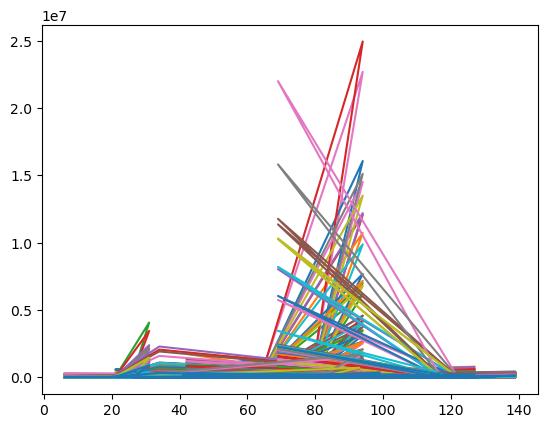

In [21]:
plt.plot(testing_data)

### Working on the Model and Defining the Layers:

In [26]:
# model= Sequential()

In [28]:
# Adding the Tensity for the model
# model.add(Dense(512))

In [30]:
# model.add(Dropout(0.1))

In [31]:
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))

In [32]:
# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [49]:
# model.fit(x_train_change,y_train_change, batch_size=128,epochs=2, verbose=True)

ValueError: Data cardinality is ambiguous:
  x sizes: 22590
  y sizes: 7530
Make sure all arrays contain the same number of samples.